# Notes

Different problems in this assignment give different number of points: 2, 3, or 4, depending on how complex a problem is. Otherwise, guidlines are the same as in Assignment 1 and each problem contains specific validation details.

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np

In [4]:
STUDENT = "Kosta Rozen"
ASSIGNMENT = 2
TEST = False

In [5]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 12

# NumPy broadcasting

### 1. Normalize matrix rows (2 points).

For a 2-dimensional array `arr`, calculate an array, in which each row is a normalized version of the corresponding row from `arr`.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[0] = (arr[0] - np.mean(arr[0])) / np.std(arr[0])` and so on for other rows.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values are drawn from a normal distribution (`np.random.normal`) with random mean and standard deviation.

In [6]:
def norm_rows(arr):
    # your code goes here
    mean = np.mean(arr, axis=(1),keepdims=True)
    std = np.std(arr,axis=(1), keepdims=True)
    return (arr-mean) / std


In [7]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_rows)

### 2. Normalize matrix columns (2 points).

Similar to Problem 1, but normalization must be performed along columns.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[:, 0] = (arr[:, 0] - np.mean(arr[:, 0])) / np.std(arr[:, 0])` and so on for other columns.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values are drawn from a normal distribution (`np.random.normal`) with random mean and standard deviation.

In [19]:
def norm_cols(arr):
    mean = np.mean(arr, axis=(0),keepdims=True)
    std = np.std(arr,axis=(0), keepdims=True)
    return (arr-mean) / std

In [20]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_cols)

### 3. Generic normalize routine (2 points).

Similar to Problems 1 and 2, but normalization must be performed according to `axis` argument. `axis=0` means normalization along the columns, and `axis=1` means normalization along the rows.

In [21]:
def norm(arr, axis):
    mean = np.mean(arr, axis=(axis),keepdims=True)
    std = np.std(arr,axis=(axis), keepdims=True)
    return (arr-mean) / std

In [11]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm)

### 4. Dot product of matrix and vector (2 points).

Calculate dot product of a 2-dimensional array $M$ of shape $(N,K)$ and 1-dimensional row vector $v$ of shape $(K,)$. You cannot use `np.dot` in this exercise.

Result must be **1-dimensional** of shape $(N,)$, and **will be tested against three random combinations of input arrays dimensions ($10 \leq n < 100 $)**. Arrays values will are
drawn from standard normal distribution (`np.random.randn`).

In [25]:
def dot(m, v):
    return (m*v).sum(axis=1)

In [28]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, dot)

### 5. Calculate recurrence matrix (3 points).

In signals (or time series) analysis, it's usualy important to quickly assess the structure (if any) of the data. This can be done in many different ways. You can test, whether a signal is stationary or look at Fourier transform to understand the frequency composition of a signal. When you want to understand, whether signal contains some recurring pattern, it's useful to perform what is called *recurrent quantification analysis*.

Imagine a signal $s_i$. Recurrence matrix is then:

$$
R_{ij} = \left\{
\begin{array}{l}
1, |s_i-s_j|<\varepsilon \\
0, |s_i-s_j|\ge\varepsilon \\
\end{array}
\right.
$$

In this exercise you need to implement a function, which calculates recurrence matrix for 1-dimensional array. The function should not use any loops and must leverage broadcasting. For reference, naive loop implementation is provided below. Plot recurrence matrices for some signals to understand, how signal structure reveals itself in the recurrence matrix.

For example, for a signal of shape $(100,)$ result must be of shape $(100, 100)$. Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)** with different signal patterns (noise, $\sin$, noise + randomly-placed recurrent pattern).

In [29]:
def recm_naive(ts, eps):
    """Loop implementation of recurrent matrix."""

    ln = len(ts)

    rm = np.zeros((ln, ln), dtype=bool)
    
    for i in range(ln):
        for j in range(ln):
            rm[i, j] = np.abs(ts[i]-ts[j])<eps
    return rm

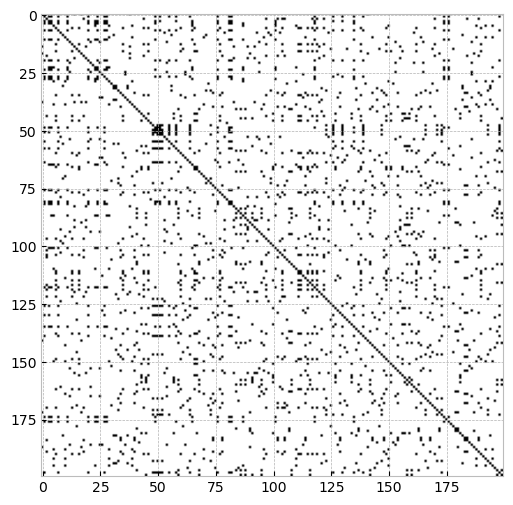

In [38]:
random_signal = np.random.randn(200)
plt.imshow(recm_naive(random_signal, 1e-1), cmap=plt.cm.binary)

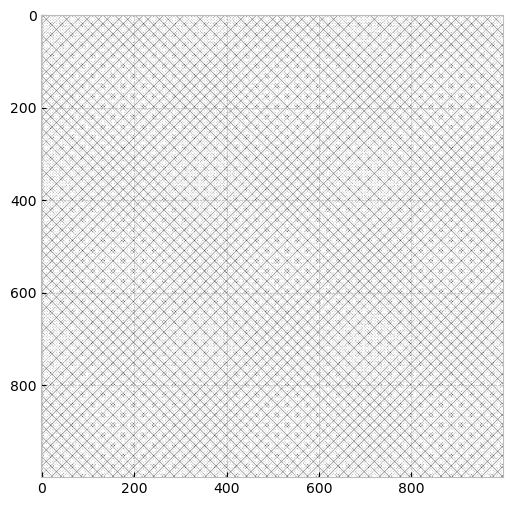

In [31]:
sin_signal = np.sin(np.arange(1000))
plt.imshow(recm_naive(sin_signal, 1e-1), cmap=plt.cm.binary)

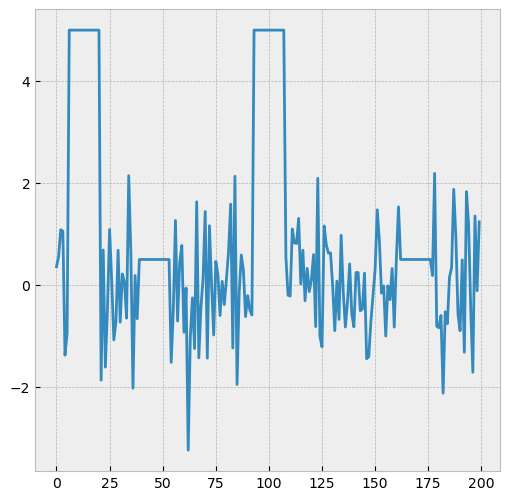

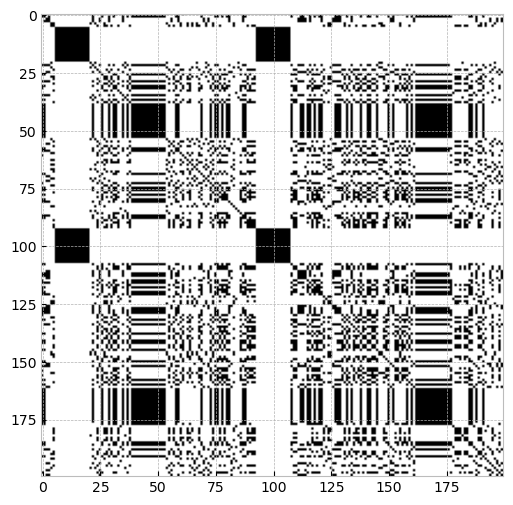

In [32]:
random_signal = np.random.randn(200)
random_signal[6:21] = 5 * np.ones((15,))
random_signal[93:108] = 5 * np.ones((15,))

random_signal[39:54] = 0.5 * np.ones((15,))
random_signal[162:177] = 0.5 * np.ones((15,))

plt.plot(random_signal)
plt.show()

plt.imshow(recm_naive(random_signal, 5e-1), cmap=plt.cm.binary);

In [34]:
def recm(ts, eps):
    a = np.expand_dims(ts,axis=0)
    b = np.expand_dims(ts,axis=1)
    return (np.abs(a - b) < eps)

In [40]:
PROBLEM_ID = 5

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, recm)

### 6. Softmax activation function (1 point).

Given a 2-dimensional array, calculate it's $\texttt{softmax}$ for each row. $\texttt{softmax}$ activation for a vector is defined as the following:

$$
\texttt{softmax} (x_i) = \frac{e^{x_i}}{\sum_i e^{x_i}}.
$$

Correspondingly, for entire array the expression is the following:

$$
\texttt{softmax} (x_{ij}) = \frac{e^{x_{ij}}}{\sum_j e^{x_{ij}}}.
$$



For example, an input array 

$$
\left(
\begin{array}{cc}
1 && 6 \\
4 && 5
\end{array}
\right)
$$

results in the following $\texttt{softmax}$ activation:

$$
\left(
\begin{array}{cc}
\frac{e^1}{e^1 + e^6} && \frac{e^6}{e^1 + e^6} \\
\frac{e^4}{e^4 + e^5} && \frac{e^5}{e^4 + e^5}
\end{array}
\right)
$$

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array elements are drawn from the standard normal distribution.

**Hint:** besides using universal functions, you will need to use broadcasting properly.

In [20]:
def softmax(arr):
  arr = np.array(arr)
  e_power = np.e**arr
  return e_power / np.sum(e_power,axis=1, keepdims=True)

In [ ]:
PROBLEM_ID = 6

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, softmax)

# Your grade

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")